In [17]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import joblib

## setting random state for reproducibility
SEED = 69
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',50)
plt.style.use(('ggplot', 'tableau-colorblind10'))

# Data Dict

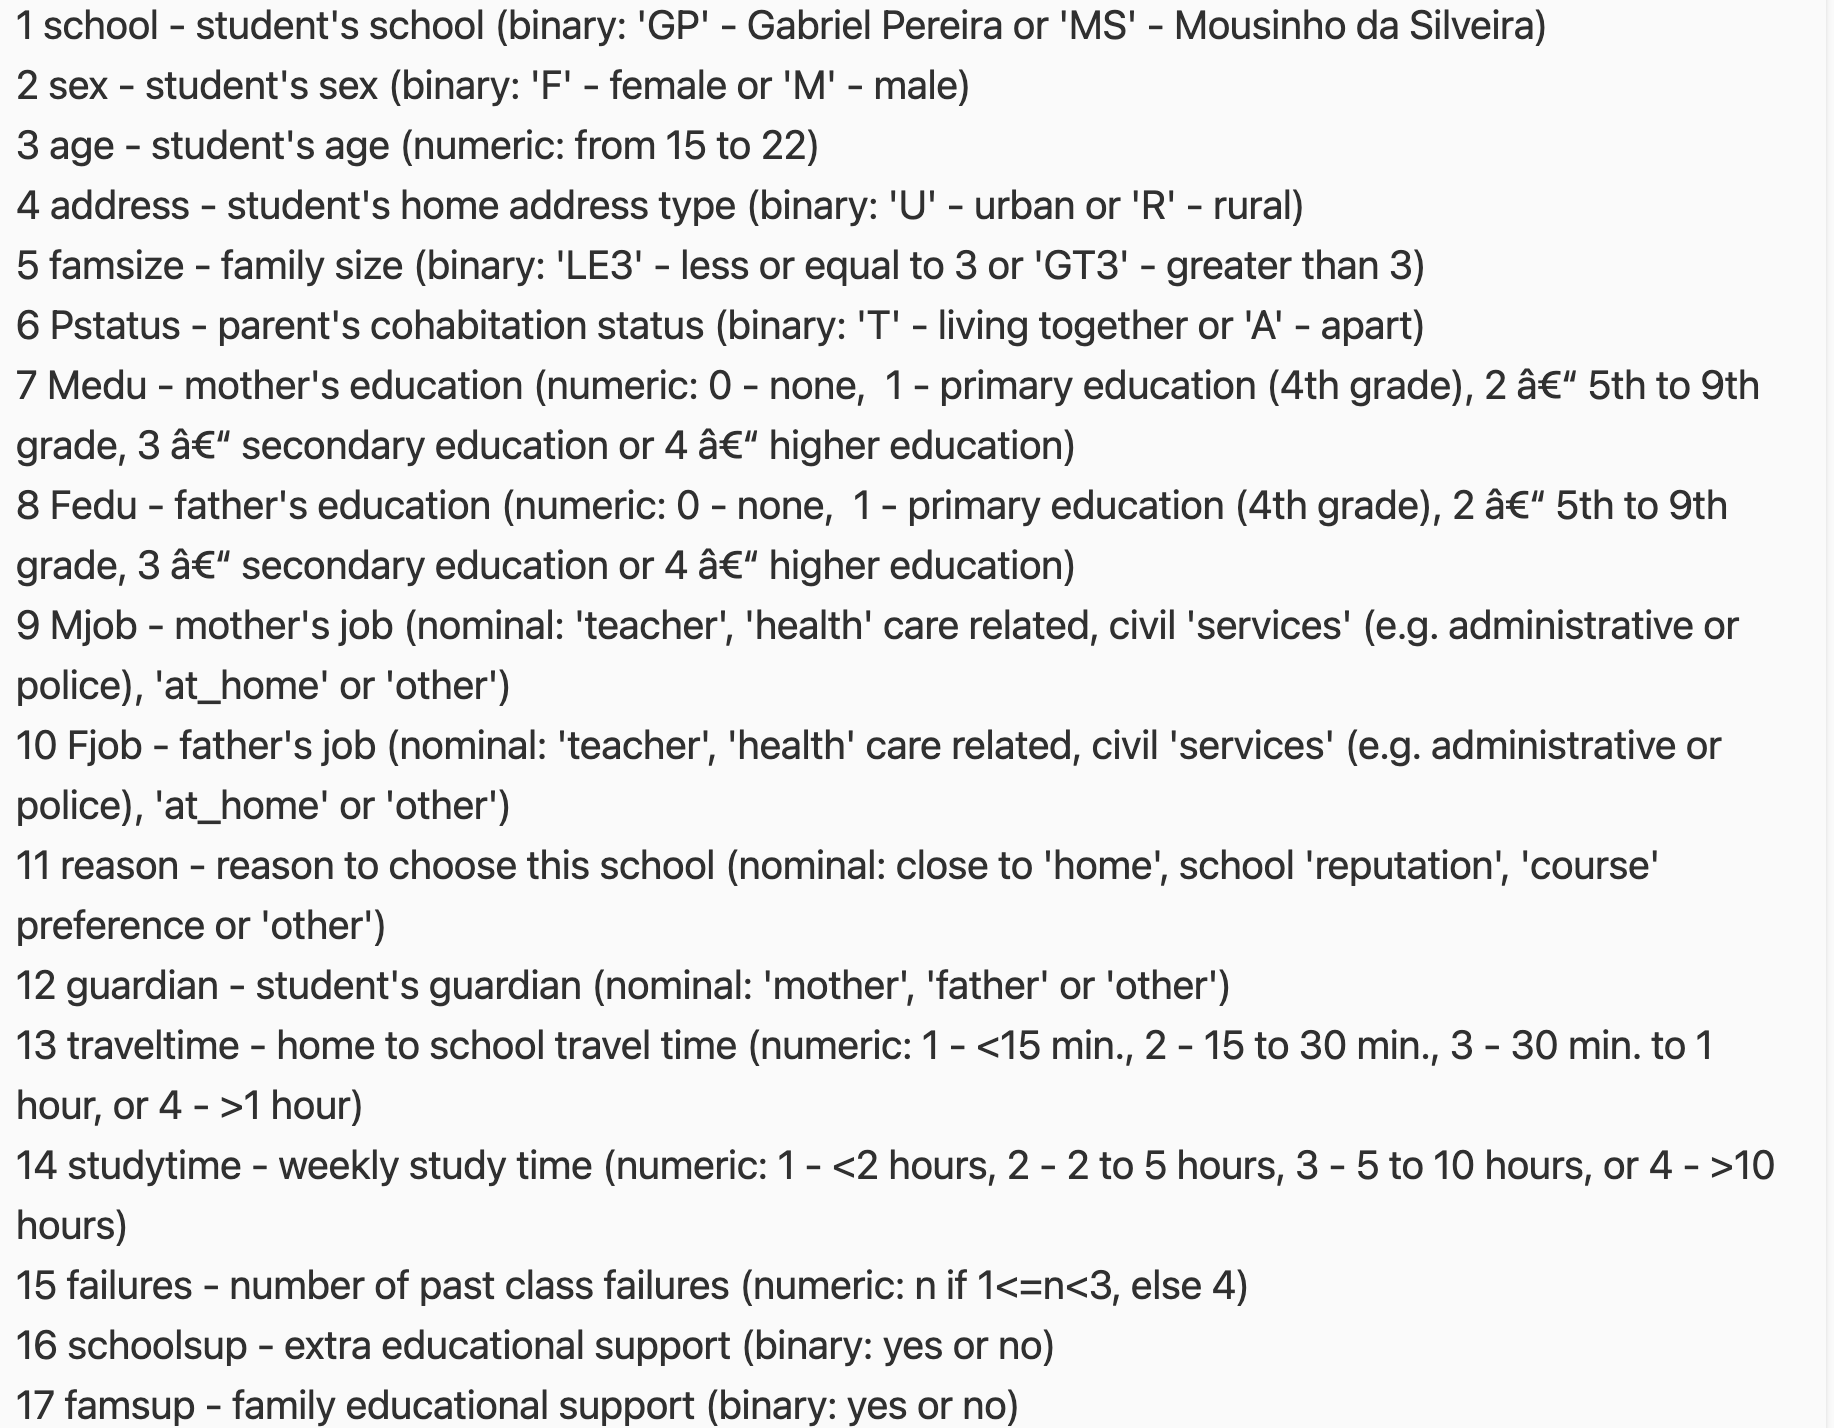

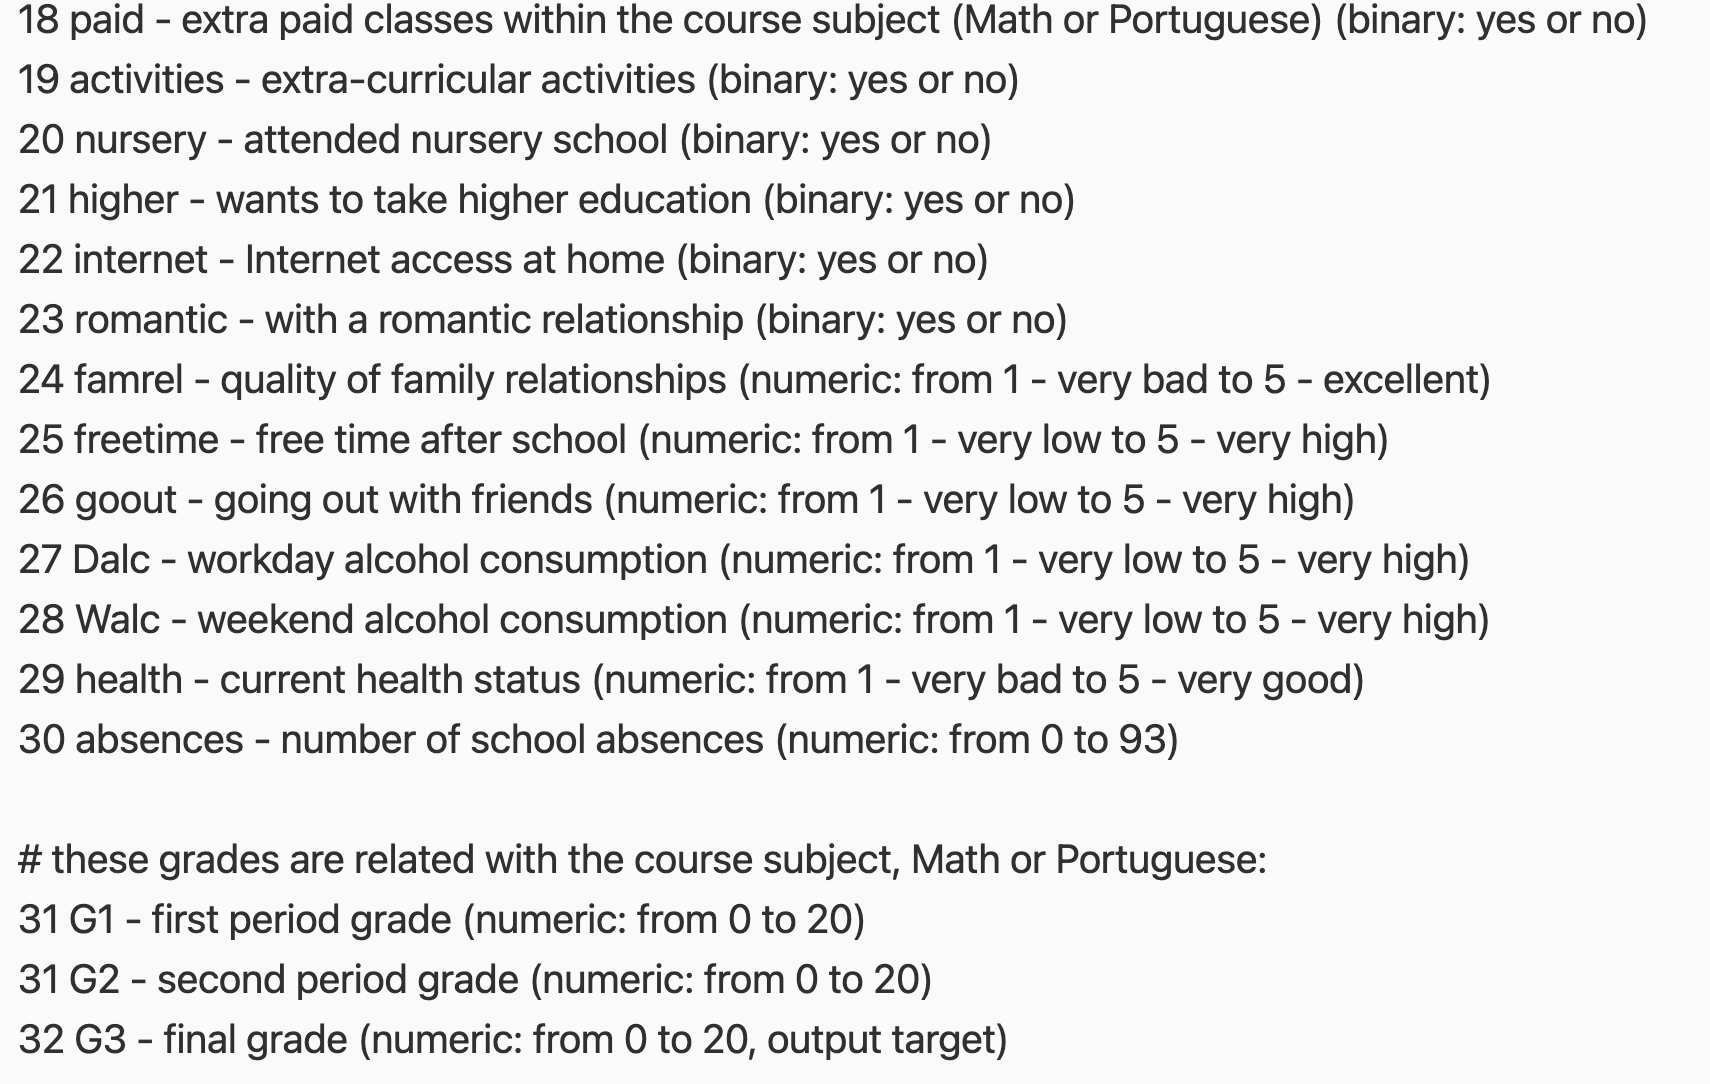

In [2]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [3]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS6xDKNpWkBBdhZSqepy48bXo55QnRv1Xy6tXTKYzZLMPjZozMfYhHQjAcC8uj9hQ/pub?output=xlsx"
df = pd.read_excel(url,sheet_name='student-mat')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


# preprocess the data

## A: Perform train-test-split with G3 as the target.


In [4]:
# train test split
## Make x and y variables
y = df['G3']
X = df.drop(columns=['G3'])
## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
42,GP,M,15,U,GT3,T,4,4,services,teacher,course,father,1,2,0,no,yes,no,yes,yes,yes,yes,no,4,3,3,1,1,5,2,19,18
327,GP,M,17,R,GT3,T,2,2,services,other,course,mother,4,1,0,no,yes,no,no,yes,yes,yes,no,4,4,5,5,5,4,8,11,10
344,GP,F,18,U,GT3,T,2,3,at_home,other,course,mother,1,3,0,no,yes,no,no,yes,yes,yes,no,4,3,3,1,2,3,4,11,10
226,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5,3,4,1,3,3,10,16,15
143,GP,F,16,U,LE3,T,1,1,at_home,at_home,course,mother,1,1,0,no,no,no,no,yes,yes,yes,no,3,4,4,3,3,1,2,14,14


## B: Use a ColumnTransformer with the required preprocessing steps


In [5]:
## make pipelines for categorical vs numeric data
cat_sel=make_column_selector(dtype_include='object')
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(drop='if_binary', sparse=False))

num_sel=make_column_selector(dtype_include='number')
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))

## make the preprocessing column transformer
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x11b6289a0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x11b628a00>)],
                  verbose_feature_names_out=False)

## C: Create DataFrame versions of your X_train and X_test data using the correct feature names.


In [6]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

X_train_df = pd.DataFrame(preprocessor.transform(X_train), 
                          columns = feature_names, index = X_train.index)
X_train_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
42,15.0,4.0,4.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,1.0,5.0,2.0,19.0,18.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
327,17.0,2.0,2.0,4.0,1.0,0.0,4.0,4.0,5.0,5.0,5.0,4.0,8.0,11.0,10.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
344,18.0,2.0,3.0,1.0,3.0,0.0,4.0,3.0,3.0,1.0,2.0,3.0,4.0,11.0,10.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
226,17.0,3.0,2.0,1.0,2.0,0.0,5.0,3.0,4.0,1.0,3.0,3.0,10.0,16.0,15.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
143,16.0,1.0,1.0,1.0,1.0,0.0,3.0,4.0,4.0,3.0,3.0,1.0,2.0,14.0,14.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [7]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test), 
                          columns = feature_names, index = X_test.index)
X_test_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
328,17.0,4.0,4.0,1.0,3.0,0.0,5.0,4.0,4.0,1.0,3.0,4.0,7.0,10.0,9.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
95,15.0,1.0,1.0,2.0,4.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0,7.0,10.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
57,15.0,4.0,4.0,1.0,2.0,0.0,3.0,2.0,2.0,1.0,1.0,5.0,4.0,14.0,15.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
237,16.0,2.0,1.0,1.0,1.0,0.0,4.0,5.0,2.0,1.0,1.0,5.0,20.0,13.0,12.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
242,16.0,4.0,3.0,1.0,1.0,0.0,5.0,4.0,5.0,1.0,1.0,3.0,0.0,6.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


# fit a tree-based model of your choice (that produces feature importances).

## A: Evaluate its performance on the training and test data.


In [8]:
reg = RandomForestRegressor(random_state=SEED)
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.98	RMSE= 0.61
Test Data:	R^2= 0.86	RMSE= 1.77


## B: extract and visualize the feature importances determined by the model.


In [15]:
## Saving the feature importances
importances = pd.Series(reg.feature_importances_, index= feature_names,
                       name='Feature Importance')
importances.head()

age           0.016680
Medu          0.002250
Fedu          0.006005
traveltime    0.001981
studytime     0.005394
Name: Feature Importance, dtype: float64

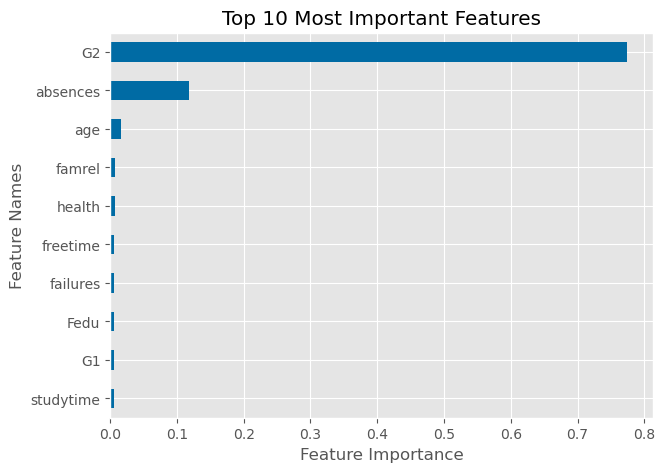

In [16]:
## Saving the feature importances sorted from smallest to largest (ascending=True)
sorted_importance = importances.sort_values()
## plotting top 10 importances and adding more spice
ax = sorted_importance.tail(10).plot(kind='barh',
                                    figsize=(7,5))
ax.set(xlabel='Feature Importance',
        ylabel='Feature Names',
        title='Top 10 Most Important Features');

## C: Answer what were the top 5 most important features?

From mo random forest model, it suggests the tope five most important features are G2, absences, age, famrel and health.


**What does it mean that they were "important"?**

An important feature is the one the often being used extensively and repeatedly by the model during the training process.

# apply sklearn's permutation_importance

## A: visualize the permutation importances.


In [19]:
## Permutation importance takes a fit model and the test data.
r = permutation_importance(reg, X_train_df, y_train,n_repeats =5)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [20]:
##  pull out the importances_mean and make it a Pandas Series 
## so it is easy to work with.
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_train_df.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances.head()

G2          1.669060
absences    0.226053
age         0.018461
G1          0.006950
Fedu        0.005787
Name: permutation importance, dtype: float64

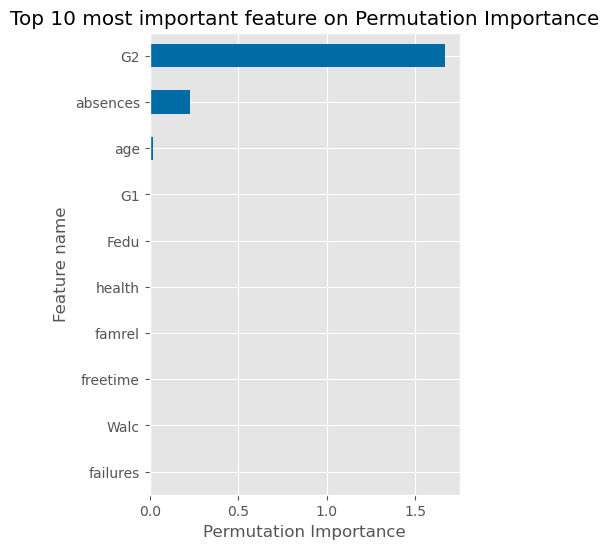

In [21]:
ax = permutation_importances.sort_values().tail(10).plot(kind='barh', figsize=(4,6))
ax.set(xlabel='Permutation Importance', ylabel='Feature name', 
       title='Top 10 most important feature on Permutation Importance');

## B: Answer what are the top 5 most important features the same as the top 5 most important features (according to our built-in importance)?

From same random forest model but in permutation importances, it suggests the top five most important features are G2, absences, age, G1 and fedu. It is different from feature importances. Among these four, they are all numeric.

# Fit a sklearn LinearRegression model

## A: Evaluate its performance on the training & test data.


# Interpreting Our Model's Coefficients

- Intercept:
Our model assumed a baseline score of 7.18

- Coefficients that Positively Influence Final Grade:
1. higher_yes (student intends to continue higher education):
Being in the yes group (wanting higher education) increases their grade by 1.695 (out of 20).

2. Fjob_teacher (father is an educator):
Having a father who is a teacher increases their grade by 1.33.

3. Mjob_health:
Having a mother who works in healthcare increases the predicted grade by 0.8.

4. sex_F:
Being female increases the predicted grade by 0.65.

5. studytime:
Increasing studytime hours by 1 (according to the ordinal scale) increases the predicted grade by 0.46.
studytime (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours).


- Coefficients that Negatively Influence Final Grade:
1. school_MS:
Attending MS subtracted 1.461 points.

2. schoolsup_yes (getting extra education support):
student getting extra support decreases the predicted score by 1.3. While this may seem paradoxical at first (why would a student with MORE help perform worse?), this could represent the effect of the student needing the extra help in the first place.

3. failures:
for every 1 failure, the predicted score decreases by 1.295.

4. Fjob_health:
Interestingly, as opposed to having a Mother in healthcare, having a father in healthcare decreases the predicted grade by .771.

5. famesize_GT3:
Having a larger family (more than 3) decreases the predicted grade by .493.

